## Overview
###### This project analyzes sample e-commerce data, scrapes product details from ikman.lk, and merges the datasets for enhanced insights. It features interactive search and filter functions, visualizations, and Excel export.

## Install dependencies

In [4]:
pip install pandas numpy matplotlib seaborn beautifulsoup4 openpyxl

Note: you may need to restart the kernel to use updated packages.


## Import necessary libraries

In [195]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import web scraping libraries
import requests
from bs4 import BeautifulSoup

# Import additional utilities
from datetime import datetime
import re
import os
from tqdm import tqdm

print("Libraries imported successfully.")

Libraries imported successfully.


## Create Sample Dataset

In [196]:
# Create a sample dataset for e-commerce purchases
data = pd.DataFrame({
    'Customer_ID': [
        'C001', 'C002', 'C003', 'C001', 'C002', 
        'C003', 'C004', 'C005', 'C001', 'C002'
    ],
    'Product_Category': [
        'Electronics', 'Clothing', 'Home Appliances', 
        'Books', 'Electronics', 'Clothing', 
        'Electronics', 'Home Appliances', 'Books', 'Accessories'
    ],
    'Purchase_Amount': [
        250.75, 45.00, 120.00, 75.50, 300.25, 
        60.00, 180.50, 95.75, 45.25, 35.00
    ],
    'Timestamp': [
        '2024-01-15 14:30:00', 
        '2024-01-15 16:00:00', 
        '2024-01-16 10:15:00',
        '2024-01-17 11:45:00',
        '2024-01-18 09:20:00',
        '2024-01-19 15:30:00',
        '2024-01-20 13:45:00',
        '2024-01-21 16:20:00',
        '2024-01-22 10:10:00',
        '2024-01-23 14:55:00'
    ]
})

# Save the dataset as a CSV file
data.to_csv('purchase_data.csv', index=False)

# Display the dataset
data

,Customer_ID,Product_Category,Purchase_Amount,Timestamp
0,C001,Electronics,250.75,2024-01-15 14:30:00
1,C002,Clothing,45.00,2024-01-15 16:00:00
2,C003,Home Appliances,120.00,2024-01-16 10:15:00
3,C001,Books,75.50,2024-01-17 11:45:00
4,C002,Electronics,300.25,2024-01-18 09:20:00
5,C003,Clothing,60.00,2024-01-19 15:30:00
6,C004,Electronics,180.50,2024-01-20 13:45:00
7,C005,Home Appliances,95.75,2024-01-21 16:20:00
8,C001,Books,45.25,2024-01-22 10:10:00
9,C002,Accessories,35.00,2024-01-23 14:55:00


# 1. Load and Preprocess Data

In [197]:
# Load the dataset from the CSV file
df = pd.read_csv('purchase_data.csv')

### 1.1 Convert date columns to the proper datetime format

In [198]:
# Convert Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [199]:
# Display the first fiw rows of the dataset
df.head()

,Customer_ID,Product_Category,Purchase_Amount,Timestamp
0,C001,Electronics,250.75,2024-01-15 14:30:00
1,C002,Clothing,45.00,2024-01-15 16:00:00
2,C003,Home Appliances,120.00,2024-01-16 10:15:00
3,C001,Books,75.50,2024-01-17 11:45:00
4,C002,Electronics,300.25,2024-01-18 09:20:00


### 1.2 Handaling missing Values

In [200]:
# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
Customer_ID         0
Product_Category    0
Purchase_Amount     0
Timestamp           0
dtype: int64


In [201]:
# Remove rows with missing values (if any)
df.dropna(inplace=True)

### 1.3 Ensure all numerical columns are correctly formatted

In [202]:
# Ensure Purchase_Amount is numeric
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')

In [203]:
# Display the cleaned dataset
df

,Customer_ID,Product_Category,Purchase_Amount,Timestamp
0,C001,Electronics,250.75,2024-01-15 14:30:00
1,C002,Clothing,45.00,2024-01-15 16:00:00
2,C003,Home Appliances,120.00,2024-01-16 10:15:00
3,C001,Books,75.50,2024-01-17 11:45:00
4,C002,Electronics,300.25,2024-01-18 09:20:00
5,C003,Clothing,60.00,2024-01-19 15:30:00
6,C004,Electronics,180.50,2024-01-20 13:45:00
7,C005,Home Appliances,95.75,2024-01-21 16:20:00
8,C001,Books,45.25,2024-01-22 10:10:00
9,C002,Accessories,35.00,2024-01-23 14:55:00


# 2. Perform Exploratory Data Analysis (EDA)

### 2.1 Display basic descriptive statistics

In [204]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Purchase_Amount            Timestamp
count        10.000000                   10
mean        120.800000  2024-01-19 03:39:00
min          35.000000  2024-01-15 14:30:00
25%          48.937500  2024-01-16 16:37:30
50%          85.625000  2024-01-19 00:25:00
75%         165.375000  2024-01-21 09:41:15
max         300.250000  2024-01-23 14:55:00
std          93.002599                  NaN


### 2.2 Calculate monthly sales totals

In [205]:
monthly_sales = df.groupby(df['Timestamp'].dt.to_period('M'))['Purchase_Amount'].sum()
print("\nMonthly Sales Breakdown:")
print(monthly_sales)


Monthly Sales Breakdown:
Timestamp
2024-01    1208.0
Freq: M, Name: Purchase_Amount, dtype: float64


### 2.3 Analyze product category performance

In [206]:
category_performance = df.groupby('Product_Category').agg({
    'Purchase_Amount': ['count', 'sum', 'mean']
})
category_performance.columns = ['Purchase_Count', 'Total_Revenue', 'Avg_Purchase']
category_performance = category_performance.sort_values('Total_Revenue', ascending=False)
print("\nProduct Category Performance:")
print(category_performance)


Product Category Performance:
                  Purchase_Count  Total_Revenue  Avg_Purchase
Product_Category                                             
Electronics                    3         731.50    243.833333
Home Appliances                2         215.75    107.875000
Books                          2         120.75     60.375000
Clothing                       2         105.00     52.500000
Accessories                    1          35.00     35.000000


### 2.4 Generate insights about customer purchases

In [207]:
customer_insights = df.groupby('Customer_ID').agg({
    'Purchase_Amount': ['count', 'sum', 'mean']
})
customer_insights.columns = ['Total_Purchases', 'Total_Spending', 'Avg_Purchase']
print("\nCustomer Purchase Insights:")
print(customer_insights)


Customer Purchase Insights:
             Total_Purchases  Total_Spending  Avg_Purchase
Customer_ID                                               
C001                       3          371.50    123.833333
C002                       3          380.25    126.750000
C003                       2          180.00     90.000000
C004                       1          180.50    180.500000
C005                       1           95.75     95.750000


# 3. Create Visualizations

### 3.1 Sales Trend Line Chart

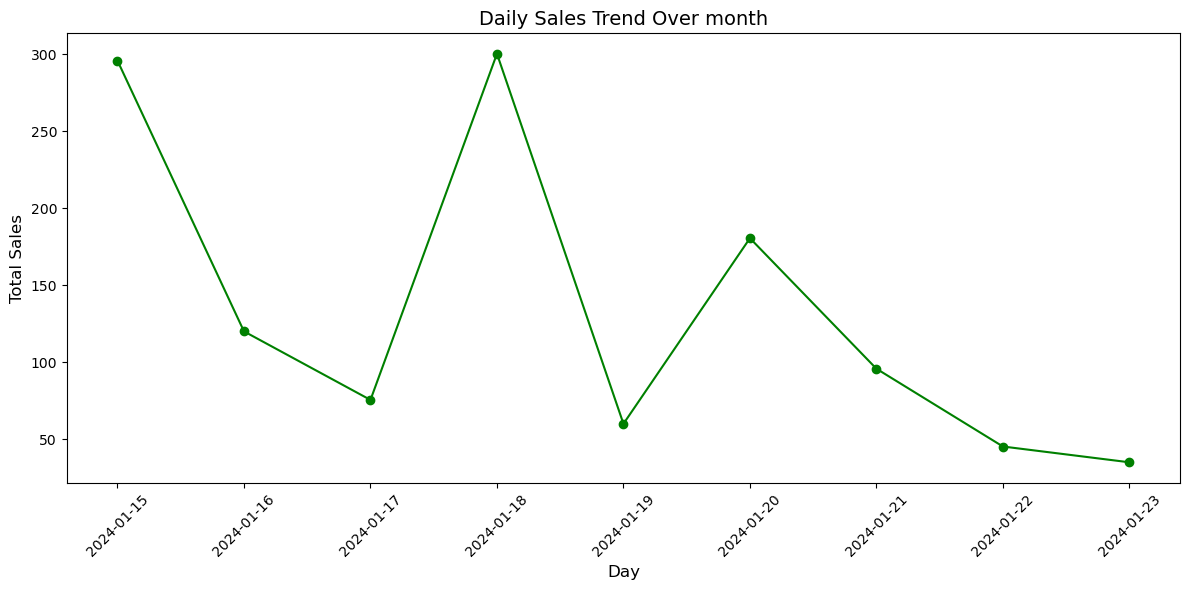

In [208]:
# Group data by day to calculate daily sales
daily_sales = df.groupby(df['Timestamp'].dt.date)['Purchase_Amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='g')
plt.title('Daily Sales Trend Over month', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

### 3.2 Category Purchase Count Bar Chart

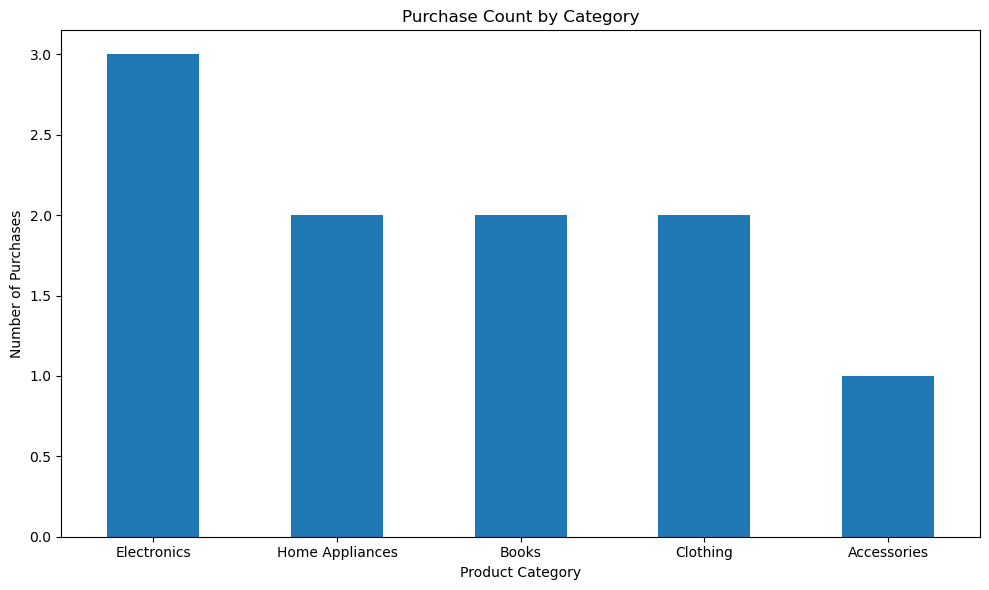

In [209]:
plt.figure(figsize=(10, 6))
category_performance['Purchase_Count'].plot(kind='bar')
plt.title('Purchase Count by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 3.4 Revenue Distribution Pie Chart

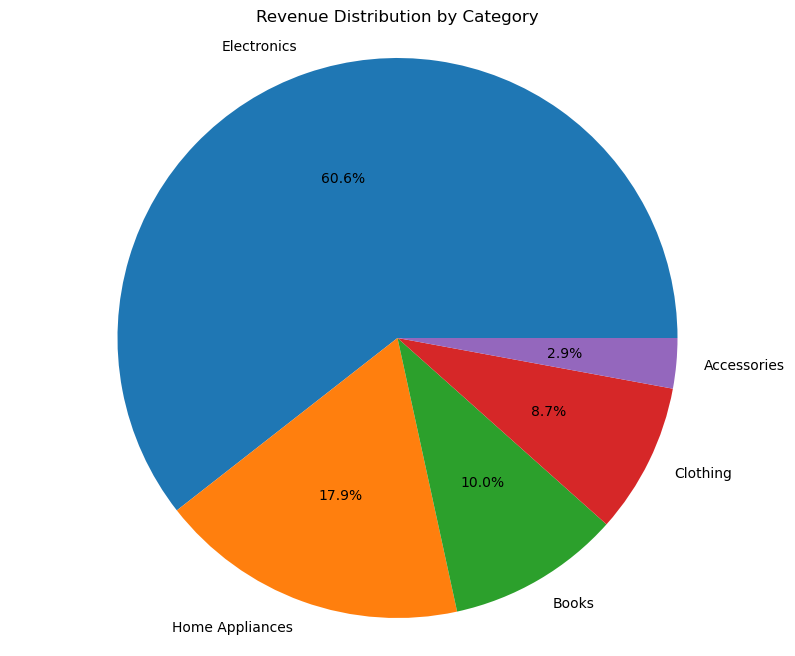

In [234]:
plt.figure(figsize=(10, 8))
plt.pie(category_performance['Total_Revenue'], 
        labels=category_performance.index, 
        autopct='%1.1f%%')
plt.title('Revenue Distribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### 3.5 Relationship between purchase amount and time Scatter Plot

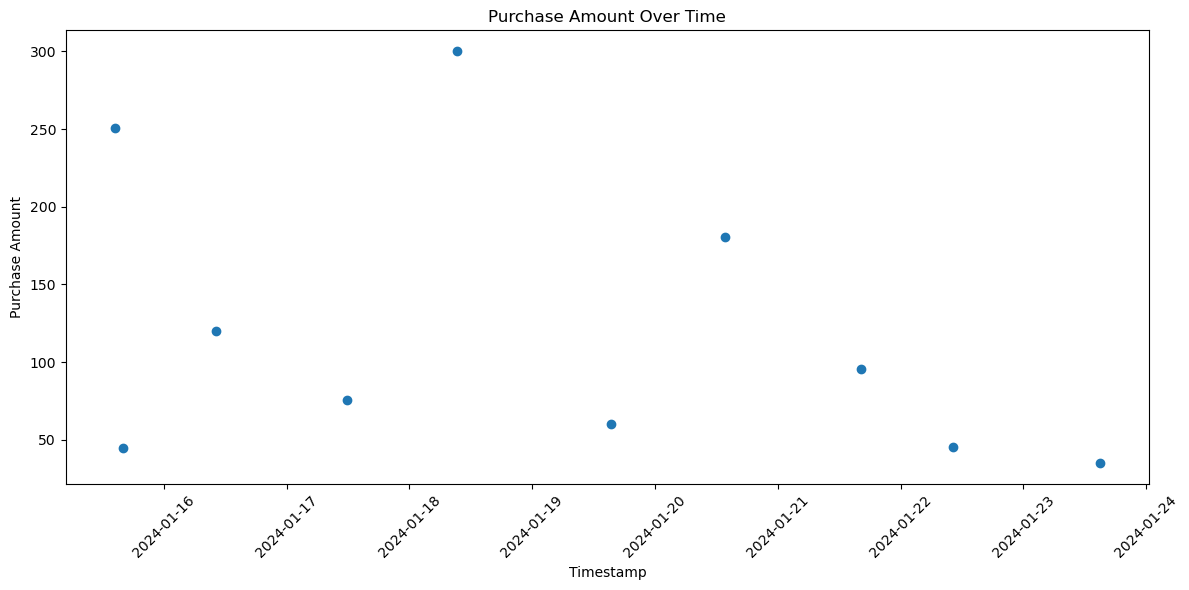

In [211]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Timestamp'], df['Purchase_Amount'])
plt.title('Purchase Amount Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Web Scraping Component

### 4.1 Extracts more than 50 items, Input number of pages and define query

In [44]:
query = ""  # you can change thise search query that you want to search
num_pages = int(input("Enter the number of pages to scrape: "))  # Input number of pages

url_base = f"https://ikman.lk/en/ads/sri-lanka?sort=relevance&order=desc&buy_now=0&urgent=0&query={query.replace(' ', '%20')}"

print(f"Scraping query: '{query}' for {num_pages} pages.")

Enter the number of pages to scrape: 5
Scraping query: '' for 5 pages.


### 4.2 Scrape data from multiple pages add into list

In [45]:
ad_list = []

for page_num in tqdm(range(1, num_pages + 1), desc="Scraping pages"):
    url = url_base + f"&page={page_num}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract ad data from the page
    ads = soup.find_all("a", class_="gtm-ad-item")

    for ad in tqdm(ads, desc=f"Processing ads on page {page_num}"):
        title = ad.find("h2").get_text()
        link = ad["href"]
        
        # Check for membership and verification
        premium_member = "member" if ad.find("div", class_=re.compile(r"^premium-member")) else "not a member"
        verified_member = "verified" if ad.find("div", class_=re.compile(r"^verified-badge-container")) else "not verified"
        
        location = ad.find("div", class_=re.compile(r"^description")).get_text().split(",")[0]
        category = ad.find("div", class_=re.compile(r"^description")).get_text().split(",")[1].strip()
        
        price = ad.find("div", class_=re.compile(r"^price")).get_text()
        
        top_ad = "top ad" if ad.find("div", class_=re.compile(r"^top-ad")) else "normal ad"
        img = ad.find("img")["src"]
        
        # Collect the ad data into a dictionary
        ad_dict = {
            "title": title,
            "link": link,
            "premium_member": premium_member,
            "verified_member": verified_member,
            "location": location,
            "category": category,
            "price": price,
            "top_ad": top_ad,
            "img": img,
        }
        
        ad_list.append(ad_dict)

# Convert the ad list to DataFrame and display
ad_data = pd.DataFrame(ad_list)

Scraping pages: 100%|████████████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.71s/it]


In [232]:
# Save the scraped data to a CSV file
ad_data.to_csv("ikman_data.csv", index=False)

print(f"Data saved to {file_name}")

Data saved to ikman_data.csv


## 4.3 EDA for scraped Data

### i. Load the Dataset

In [212]:
# Load the dataset
df_ikman = pd.read_csv('ikman_data.csv')

# Display the first few rows
df_ikman.head()

,title,link,premium_member,verified_member,location,category,price,top_ad,img
0,Ashok Layland Tipper 2017,/en/ad/ashok-layland-tipper-2017-for-sale-gamp...,not a member,not verified,Gampaha,Heavy Duty,"Rs 5,500,000",top ad,https://i.ikman-st.com/ashok-layland-tipper-20...
1,80% Easy Leasing 12% ( 7 Years ) Suzuki Wagon ...,/en/ad/80-percent-easy-leasing-12-percent-7-ye...,member,verified,Kalutara,Auto Services,"Rs 1,015",top ad,https://i.ikman-st.com/80-percent-easy-leasing...
2,Xiaomi Redmi Note 13 8GB|256GB (NEW),/en/ad/xiaomi-redmi-note-13-8gb256gb-new-for-s...,member,verified,Colombo,Mobile Phones,"Rs 49,999",normal ad,https://i.ikman-st.com/xiaomi-redmi-note-13-8g...
3,"Land for Sale in Gonapola, Horana",/en/ad/land-for-sale-in-gonapola-horana-for-sa...,not a member,not verified,Kalutara,Land For Sale,"Rs 400,000 per perch",normal ad,https://i.ikman-st.com/land-for-sale-in-gonapo...
4,Samsung Galaxy Tab A9|4GB RAM|64GB|01,/en/ad/samsung-galaxy-tab-a94gb-ram64gb01-for-...,member,verified,Colombo,Computers & Tablets,"Rs 37,990",normal ad,https://i.ikman-st.com/samsung-galaxy-tab-a94g...


### ii. Get Basic Information About the Dataset

In [213]:
# Check the shape of the dataset
print(f"Dataset contains {df_ikman.shape[0]} rows and {df_ikman.shape[1]} columns.")

# Check column names and data types
print(df_ikman.info())

# Check for missing values
print(df_ikman.isnull().sum())

Dataset contains 135 rows and 9 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            135 non-null    object
 1   link             135 non-null    object
 2   premium_member   135 non-null    object
 3   verified_member  135 non-null    object
 4   location         135 non-null    object
 5   category         135 non-null    object
 6   price            130 non-null    object
 7   top_ad           135 non-null    object
 8   img              135 non-null    object
dtypes: object(9)
memory usage: 9.6+ KB
None
title              0
link               0
premium_member     0
verified_member    0
location           0
category           0
price              5
top_ad             0
img                0
dtype: int64


### iii.Convert price to Integer

In [214]:
import numpy as np

# Remove "Rs " prefix, commas, and any non-numeric characters
df_ikman['price'] = df_ikman['price'].str.replace("Rs ", "", regex=False)  # Remove "Rs "
df_ikman['price'] = df_ikman['price'].str.replace(",", "")  # Remove commas
df_ikman['price'] = df_ikman['price'].str.extract(r'(\d+)')  # Extract only numeric values

# Convert to numeric (float or int), setting invalid entries to NaN
df_ikman['price'] = pd.to_numeric(df_ikman['price'], errors='coerce')

# Drop rows where price could not be converted or replace NaN with a default value
df_ikman = df_ikman.dropna(subset=['price'])  # Drop rows with NaN in the price column
df_ikman['price'] = df_ikman['price'].astype(int)  # Convert to integer

# Verify the cleaned price column
print(df_ikman['price'].head())


0    5500000
1       1015
2      49999
3     400000
4      37990
Name: price, dtype: int32


### iv. Data Cleaning 

In [215]:
# Drop duplicate rows
df_ikman = df_ikman.drop_duplicates()

# Ensure 'price' column is numeric
df_ikman['price'] = pd.to_numeric(df_ikman['price'], errors='coerce')

# Handle missing values
df_ikman['price'] = df_ikman['price'].fillna(df_ikman['price'].mean())  # Fill NaN with mean price

# Drop rows with remaining missing values (if any other columns have NaN)
df_ikman = df_ikman.dropna()

# Verify the changes
df_ikman.head()


,title,link,premium_member,verified_member,location,category,price,top_ad,img
0,Ashok Layland Tipper 2017,/en/ad/ashok-layland-tipper-2017-for-sale-gamp...,not a member,not verified,Gampaha,Heavy Duty,5500000,top ad,https://i.ikman-st.com/ashok-layland-tipper-20...
1,80% Easy Leasing 12% ( 7 Years ) Suzuki Wagon ...,/en/ad/80-percent-easy-leasing-12-percent-7-ye...,member,verified,Kalutara,Auto Services,1015,top ad,https://i.ikman-st.com/80-percent-easy-leasing...
2,Xiaomi Redmi Note 13 8GB|256GB (NEW),/en/ad/xiaomi-redmi-note-13-8gb256gb-new-for-s...,member,verified,Colombo,Mobile Phones,49999,normal ad,https://i.ikman-st.com/xiaomi-redmi-note-13-8g...
3,"Land for Sale in Gonapola, Horana",/en/ad/land-for-sale-in-gonapola-horana-for-sa...,not a member,not verified,Kalutara,Land For Sale,400000,normal ad,https://i.ikman-st.com/land-for-sale-in-gonapo...
4,Samsung Galaxy Tab A9|4GB RAM|64GB|01,/en/ad/samsung-galaxy-tab-a94gb-ram64gb01-for-...,member,verified,Colombo,Computers & Tablets,37990,normal ad,https://i.ikman-st.com/samsung-galaxy-tab-a94g...


#### Save Cleaned Data

In [216]:
# Save the cleaned dataset
df_ikman.to_csv("ikman_data_cleaned.csv", index=False)
print("Cleaned dataset saved as 'ikman_data_cleaned.csv'.")


Cleaned dataset saved as 'ikman_data_cleaned.csv'.


### v. Analysis

In [217]:
# Load the Cleaned dataset
ikman_df = pd.read_csv('ikman_data_cleaned.csv')

# Display the first few rows
ikman_df.head()

,title,link,premium_member,verified_member,location,category,price,top_ad,img
0,Ashok Layland Tipper 2017,/en/ad/ashok-layland-tipper-2017-for-sale-gamp...,not a member,not verified,Gampaha,Heavy Duty,5500000,top ad,https://i.ikman-st.com/ashok-layland-tipper-20...
1,80% Easy Leasing 12% ( 7 Years ) Suzuki Wagon ...,/en/ad/80-percent-easy-leasing-12-percent-7-ye...,member,verified,Kalutara,Auto Services,1015,top ad,https://i.ikman-st.com/80-percent-easy-leasing...
2,Xiaomi Redmi Note 13 8GB|256GB (NEW),/en/ad/xiaomi-redmi-note-13-8gb256gb-new-for-s...,member,verified,Colombo,Mobile Phones,49999,normal ad,https://i.ikman-st.com/xiaomi-redmi-note-13-8g...
3,"Land for Sale in Gonapola, Horana",/en/ad/land-for-sale-in-gonapola-horana-for-sa...,not a member,not verified,Kalutara,Land For Sale,400000,normal ad,https://i.ikman-st.com/land-for-sale-in-gonapo...
4,Samsung Galaxy Tab A9|4GB RAM|64GB|01,/en/ad/samsung-galaxy-tab-a94gb-ram64gb01-for-...,member,verified,Colombo,Computers & Tablets,37990,normal ad,https://i.ikman-st.com/samsung-galaxy-tab-a94g...


#### Summary statistics for numerical columns

In [218]:
print("\nDescriptive Statistics:")
print(ikman_df.describe())


Descriptive Statistics:
              price
count  1.200000e+02
mean   4.335119e+06
std    1.554687e+07
min    7.000000e+01
25%    2.037500e+04
50%    6.000000e+04
75%    2.235000e+05
max    1.250000e+08


##### Count of Categories

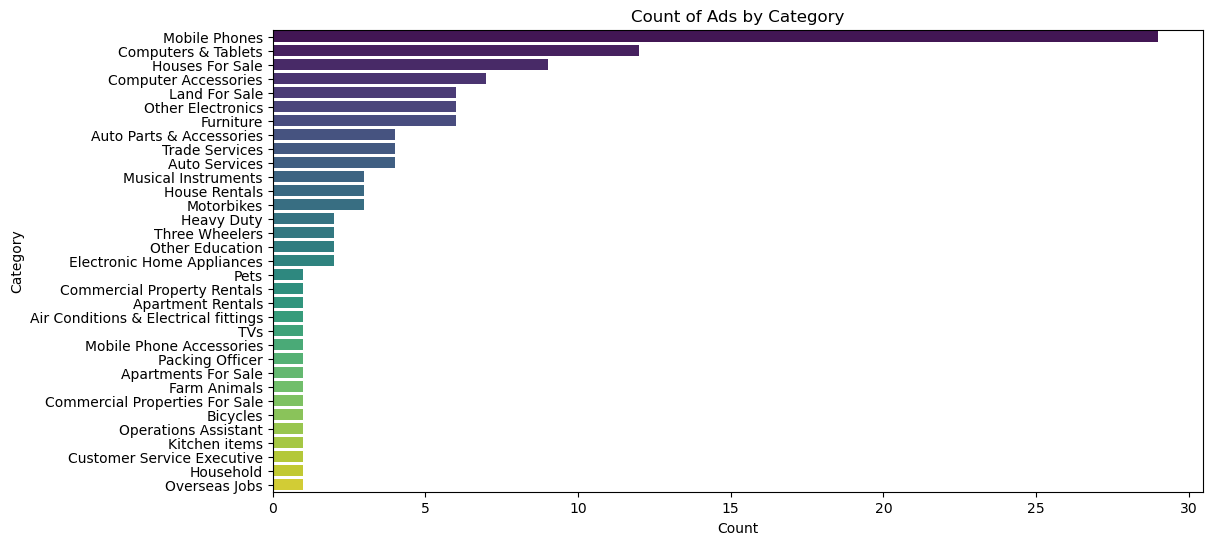

In [219]:
# Countplot for category
plt.figure(figsize=(12, 6))
sns.countplot(y=ikman_df['category'], order=ikman_df['category'].value_counts().index, palette="viridis")
plt.title('Count of Ads by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


##### Distribution of Price

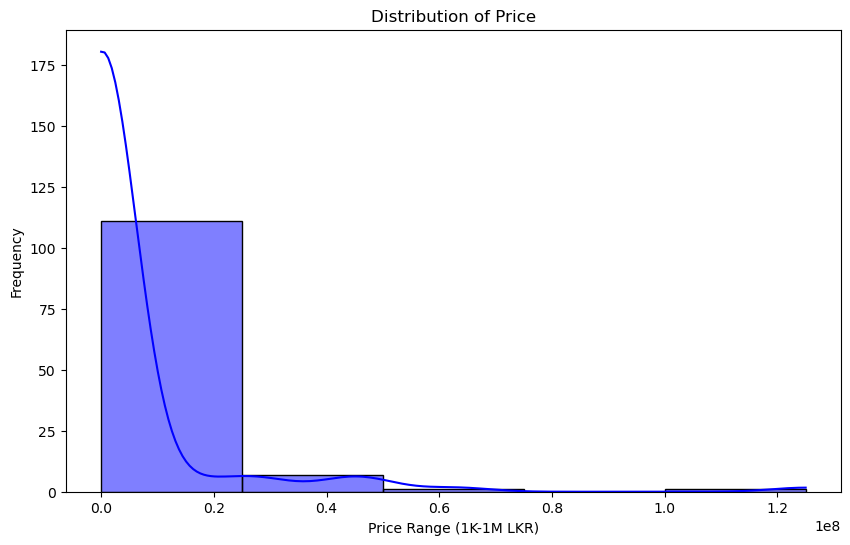

In [220]:
# Visualize the distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(ikman_df['price'], kde=True, bins=5, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price Range (1K-1M LKR)')
plt.ylabel('Frequency')
plt.show()

##### Price Distribution Across Categories box plot

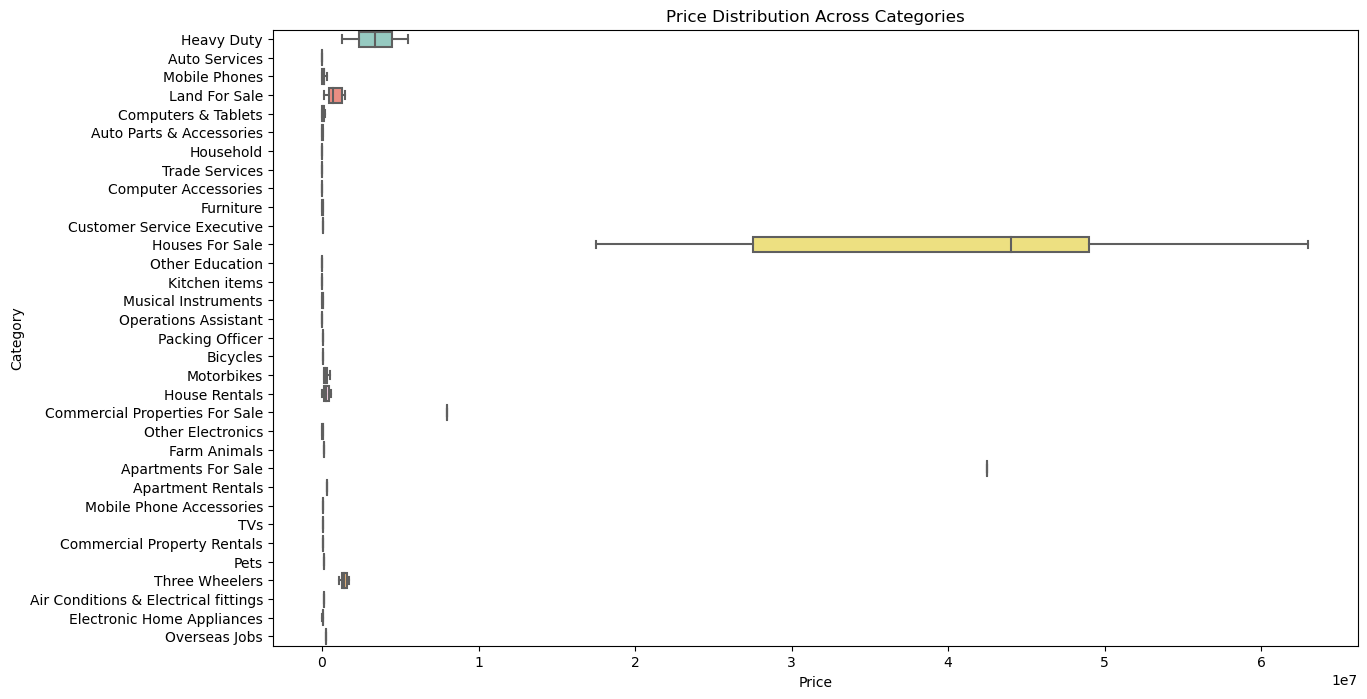

In [221]:
# Plot a box plot to visualize price distribution for each category
plt.figure(figsize=(14, 8))
sns.boxplot(x='price', y='category', data=ikman_df, showfliers=False, palette='Set3')
plt.title('Price Distribution Across Categories')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

##### Verified vs Premium Members

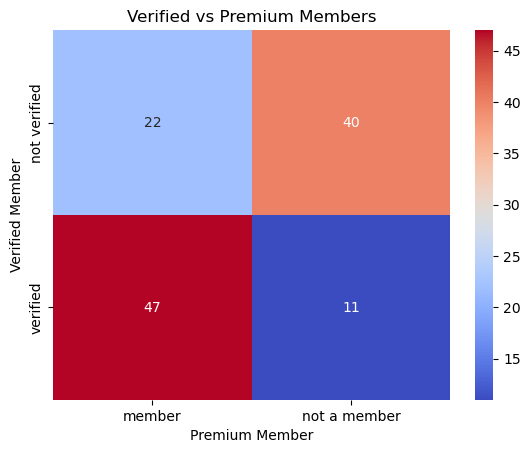

In [222]:
# Cross-tabulation and heatmap
cross_tab = pd.crosstab(df_ikman['verified_member'], df_ikman['premium_member'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Verified vs Premium Members')
plt.xlabel('Premium Member')
plt.ylabel('Verified Member')
plt.show()

### vi.  Integrate the scraped data into the existing dataset

In [223]:
# Read the two CSV files
purchase_data = pd.read_csv('purchase_data.csv')
ikman_data = pd.read_csv('ikman_data_cleaned.csv')

### Merge the datasets 

In [224]:
# Add 'Product_Category' to 'category' and drop 'Product_Category'
if 'Product_Category' in purchase_data.columns:
    purchase_data['category'] = purchase_data['Product_Category']
    purchase_data = purchase_data.drop(columns=['Product_Category'])

if 'Product_Category' in ikman_data.columns:
    ikman_data['category'] = ikman_data['Product_Category']
    ikman_data = ikman_data.drop(columns=['Product_Category'])

# Combine datasets
merged_dataset = pd.concat([purchase_data, ikman_data], ignore_index=True)

# Display the combined dataset to confirm
display(merged_dataset)

,Customer_ID,Purchase_Amount,Timestamp,category,title,link,premium_member,verified_member,location,price,top_ad,img
0,C001,250.75,2024-01-15 14:30:00,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C002,45.00,2024-01-15 16:00:00,Clothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C003,120.00,2024-01-16 10:15:00,Home Appliances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C001,75.50,2024-01-17 11:45:00,Books,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C002,300.25,2024-01-18 09:20:00,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
125,NaN,NaN,NaN,Overseas Jobs,Fruit Picking (male) - Romania,/en/ad/fruit-picking-male-romania-matale-1,not a member,not verified,Matale,249000.0,normal ad,https://i.ikman-st.com/u/fruit-picking-male-ro...
126,NaN,NaN,NaN,Mobile Phones,Samsung Galaxy S24 Ultra 12/256 Vietnam TDRA (...,/en/ad/samsung-galaxy-s24-ultra-12-256-vietnam...,member,verified,Colombo,243000.0,normal ad,https://i.ikman-st.com/u/samsung-galaxy-s24-ul...
127,NaN,NaN,NaN,Computers & Tablets,Lenovo ThinkPad T480s 14” Business Laptop Core...,/en/ad/lenovo-thinkpad-t480s-14-business-lapto...,not a member,verified,Colombo,77500.0,normal ad,https://i.ikman-st.com/lenovo-thinkpad-t480s-1...
128,NaN,NaN,NaN,Mobile Phones,Apple iPhone 14 128GB (Used),/en/ad/apple-iphone-14-128gb-used-for-sale-col...,member,not verified,Colombo,146600.0,normal ad,https://i.ikman-st.com/apple-iphone-14-128gb-u...


### Summary Report: Highlighting Top-Performing Products with Additional Scraped Data

#### i. Perform Category Performance Analysis

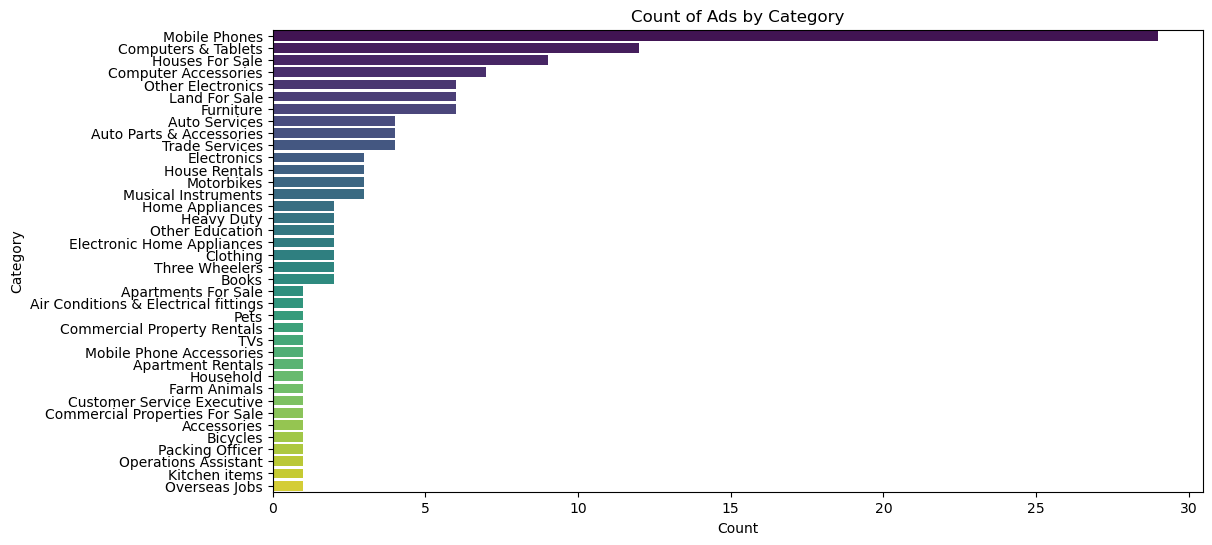

In [225]:
# Countplot for category
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_dataset['category'], order=merged_dataset['category'].value_counts().index, palette="viridis")
plt.title('Count of Ads by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

#### ii. Sorted products base on highest to lowest price

In [226]:
sorted_products = merged_dataset.sort_values(by='price', ascending=False)
display(sorted_products)

,Customer_ID,Purchase_Amount,Timestamp,category,title,link,premium_member,verified_member,location,price,top_ad,img
114,NaN,NaN,NaN,Houses For Sale,Nicely House for Sale in Battaramulla,/en/ad/nicely-house-for-sale-in-battaramulla-f...,member,verified,Colombo,125000000.0,normal ad,https://i.ikman-st.com/nicely-house-for-sale-i...
110,NaN,NaN,NaN,Houses For Sale,Nicely Super House for Sale in Battaramulla,/en/ad/nicely-super-house-for-sale-in-battaram...,member,verified,Colombo,63000000.0,normal ad,https://i.ikman-st.com/nicely-super-house-for-...
29,NaN,NaN,NaN,Houses For Sale,House for Sale at Queens Park Residencies Nawala,/en/ad/house-for-sale-at-queens-park-residenci...,not a member,not verified,Colombo,49000000.0,normal ad,https://i.ikman-st.com/house-for-sale-at-queen...
31,NaN,NaN,NaN,Houses For Sale,House for Sale Nugegoda,/en/ad/house-for-sale-an-investor-for-sale-col...,not a member,not verified,Colombo,46000000.0,normal ad,https://i.ikman-st.com/house-for-sale-an-inves...
82,NaN,NaN,NaN,Houses For Sale,3 Story Fully Furnished Luxury House for Sale ...,/en/ad/3-story-fully-furnished-luxury-house-fo...,not a member,not verified,Gampaha,44000000.0,top ad,https://i.ikman-st.com/u/3-story-fully-furnish...
...,...,...,...,...,...,...,...,...,...,...,...,...
5,C003,60.00,2024-01-19 15:30:00,Clothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C004,180.50,2024-01-20 13:45:00,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C005,95.75,2024-01-21 16:20:00,Home Appliances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C001,45.25,2024-01-22 10:10:00,Books,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
# Save the cleaned dataset
merged_dataset.to_csv("merged_dataset.csv", index=False)
print(" Merged dataset saved as 'merged_dataset.csv'.")

 Merged dataset saved as 'merged_dataset.csv'.


## 5. Custom Analytics Features

### 5.1 Search Function: Display All Purchases by a Specific Customer

In [228]:
# Input: Customer ID
customer_id = input("Enter Customer ID to search purchases (e.g., C001): ")

# Search for purchases made by the specified customer
customer_purchases = df[df['Customer_ID'] == customer_id]

# Display the purchases
if not customer_purchases.empty:
    print(f"All purchases by Customer {customer_id}:")
    print(customer_purchases)
else:
    print(f"No purchases found for Customer {customer_id}.")

Enter Customer ID to search purchases (e.g., C001): C002
All purchases by Customer C002:
  Customer_ID Product_Category  Purchase_Amount           Timestamp
1        C002         Clothing            45.00 2024-01-15 16:00:00
4        C002      Electronics           300.25 2024-01-18 09:20:00
9        C002      Accessories            35.00 2024-01-23 14:55:00


### 5.2 Filter Function: Find Purchases within a Date Range or Exceeding a Given Amount

In [229]:
# Input: Start date, end date, and minimum purchase amount
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")
min_purchase_amount = float(input("Enter minimum purchase amount: "))

# Filter purchases based on inputs
filtered_purchases = df[
    (df['Timestamp'] >= pd.to_datetime(start_date)) &
    (df['Timestamp'] <= pd.to_datetime(end_date)) &
    (df['Purchase_Amount'] > min_purchase_amount)
]

# Display filtered purchases
if not filtered_purchases.empty:
    print(f"Purchases from {start_date} to {end_date} with amounts exceeding {min_purchase_amount}:")
    print(filtered_purchases)
else:
    print(f"No purchases found in the specified range or amount.")

Enter start date (YYYY-MM-DD): 2024 01 01
Enter end date (YYYY-MM-DD): 2024 01 30
Enter minimum purchase amount: 10
Purchases from 2024 01 01 to 2024 01 30 with amounts exceeding 10.0:
  Customer_ID Product_Category  Purchase_Amount           Timestamp
0        C001      Electronics           250.75 2024-01-15 14:30:00
1        C002         Clothing            45.00 2024-01-15 16:00:00
2        C003  Home Appliances           120.00 2024-01-16 10:15:00
3        C001            Books            75.50 2024-01-17 11:45:00
4        C002      Electronics           300.25 2024-01-18 09:20:00
5        C003         Clothing            60.00 2024-01-19 15:30:00
6        C004      Electronics           180.50 2024-01-20 13:45:00
7        C005  Home Appliances            95.75 2024-01-21 16:20:00
8        C001            Books            45.25 2024-01-22 10:10:00
9        C002      Accessories            35.00 2024-01-23 14:55:00


### 5.3 Calculate Total Revenue by a Product Category

In [23]:
# Input: Product category
category = input("Enter product category to calculate revenue (e.g., Electronics): ")

# Calculate revenue
category_revenue = df[df['Product_Category'] == category]['Purchase_Amount'].sum()

# Display the revenue
if category_revenue > 0:
    print(f"Total revenue for {category}: {category_revenue:.2f} LKR")
else:
    print(f"No revenue found for the category '{category}'.")

Enter product category to calculate revenue (e.g., Electronics): Electronics
Total revenue for Electronics: 731.50 LKR


## Export the filtered data or summary report into an Excel file - Bonus Challenge

In [231]:
# Create an Excel writer object
with pd.ExcelWriter('sales_analysis.xlsx') as writer:
    # Save customer purchases to a sheet
    customer_purchases.to_excel(writer, sheet_name='Customer_Purchases', index=False)
    
    # Save filtered purchases to another sheet
    filtered_purchases.to_excel(writer, sheet_name='Filtered_Purchases', index=False)
    
    # Save category-specific data to a third sheet
    category_data = df[df['Product_Category'] == category]
    category_data.to_excel(writer, sheet_name='Category_Sales', index=False)

print("All data saved to sales_analysis.xlsx")

All data saved to sales_analysis.xlsx
